# Text summarization using TextRank

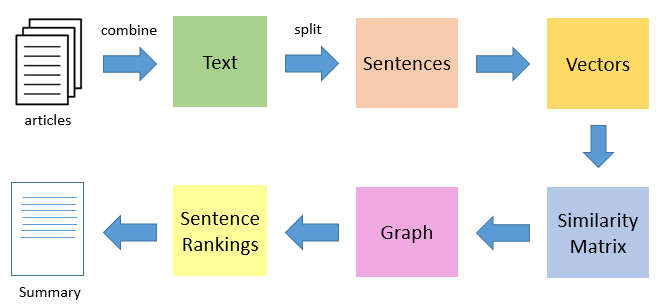

For this tutorial, we will perform extractive text summarization following the flow above, and the step are as follow; <br>
1) combining text from all articles to a single text <br>
2) spliting text into sentences <br>
3) extracting sentence embedding <br>
4) Measuring sentence similarity and creating the matrix  <br>
5) Converting similarity matrix into Graph representation  <br>
6) Rank sentence importance by similarity score

## import dependency

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
nltk.download('punkt') # one time execution
nltk.download('stopwords') # stopword

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Renan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

## data use
we going to use abstract of my publication as the example for extractive text summarization

In [ ]:
# # zombie apocalypse in Bangkok
# data = '''
# The bustling city of Bangkok, Thailand, was known for its vibrant street life, spicy cuisine, and rich culture. But one fateful day, everything changed. Reports of a strange virus spreading rapidly began to surface, and soon, Bangkok found itself in the grip of a zombie apocalypse.
# The virus spread like wildfire, turning ordinary citizens into bloodthirsty creatures. Streets that were once filled with people now became overrun with hordes of the undead, hungry for human flesh. Panic and chaos ensued as the city descended into madness.
# Amidst the chaos, a small group of survivors banded together to fight for their lives. Among them was Kai, a former soldier who had experience in combat. He quickly took charge, leading the group through the zombie-infested streets, scavenging for supplies and seeking shelter.
# The survivors faced numerous challenges. They encountered swarms of zombies at every turn, and had to use their wits and skills to outsmart and outrun them. They also faced conflicts within the group, as tensions ran high and resources became scarce. But they persevered, determined to survive in this new world.
# As they moved through the city, they encountered both friends and foes. They found a group of survivors holed up in an abandoned shopping mall, led by a tough woman named Nisa. Together, they formed an alliance and worked to fortify their stronghold, fending off wave after wave of zombie attacks.
# However, not all survivors were friendly. They encountered ruthless scavengers who would stop at nothing to take what little supplies they had. They also had to be on guard against other survivors who had succumbed to the virus and turned into zombies themselves.
# As time passed, the survivors grew weary, both physically and mentally. They had lost loved ones to the zombies, and the constant threat of death weighed heavily on them. But they also found moments of hope and camaraderie, as they shared stories, memories, and dreams of a world free from the undead.
# Kai and Nisa, in particular, developed a close bond as they worked together to keep the group safe. They found solace in each other's company, finding brief moments of respite from the horrors of the zombie-infested city.
# With each passing day, the group became more skilled in dealing with the undead. They learned to move silently, use weapons effectively, and strategize their movements. They also discovered hidden pockets of survivors who had managed to survive in the midst of the chaos, and joined forces to increase their chances of survival.
# One day, they heard rumors of a safe haven outside the city, where a group of scientists were working on a cure for the virus. With renewed hope, they embarked on a perilous journey, battling hordes of zombies and overcoming obstacles along the way.
# Finally, after weeks of grueling travel, they reached the supposed safe haven. But what they found was a deserted lab, overrun by zombies. It seemed that the scientists had failed in their quest for a cure.
# Heartbroken and disillusioned, the group was on the verge of giving up. But Kai, Nisa, and a few others refused to accept defeat. They decided to stay and continue the fight, knowing that they were the last hope for humanity's survival.
# And so, the group of survivors remained in Bangkok, fighting tirelessly against the zombie horde, never giving up hope. They knew that the road ahead would be difficult, but they were determined to make a stand and reclaim their city from the undead. For in the midst of darkness, they had found a flicker of hope, and they would fight until their last breath to ensure that humanity would prevail.
# And so, the story of Bangkok Undead continues, as the survivors battle the zombies, confront their fears, and fight for their survival in the post-apocalyptic city of Bangkok. They became skilled in their tactics, using their knowledge of the city's layout and landmarks to their advantage. They created traps, barricades, and improvised weapons to fend off the relentless onslaught of the undead.
# Kai and Nisa's bond grew stronger as they faced numerous challenges together. They relied on each other for support and encouragement, and their friendship blossomed into something deeper. Despite the constant danger, they found solace in each other's presence, finding moments of tenderness amidst the chaos.
# One day, while scavenging for supplies in an abandoned hospital, they stumbled upon a group of survivors who were in desperate need of help. Among them was a doctor named Dr. Somsak, who revealed that he had been working on a potential cure for the virus before his lab was overrun by zombies. He had managed to escape with some crucial research data, and he believed that he could continue his work with the help of the group.
# Kai, Nisa, and the others agreed to assist Dr. Somsak in his research, seeing it as a glimmer of hope in the bleakness of their situation. They battled their way through the city, gathering resources and fending off zombies to protect the doctor and his research.
# As they worked tirelessly to find a cure, they faced setbacks and sacrifices. Some of their fellow survivors fell victim to the virus, and they mourned their losses. They also had to contend with other groups of survivors who saw the potential cure as a means to gain power and control in the new world.
# Amidst the chaos, Kai and Nisa's relationship deepened, and they found comfort and strength in each other's presence. They leaned on each other during moments of doubt and fear, finding solace in their shared mission to save humanity.
# After weeks of tireless effort, Dr. Somsak finally made a breakthrough. He synthesized a potential cure using the data he had salvaged, and the group eagerly tested it on a small group of infected individuals. Miraculously, it worked, and the infected individuals began to show signs of recovery.
# Hope spread among the survivors, and they mobilized to administer the cure to as many infected individuals as possible. They battled their way through hordes of zombies to reach different parts of the city, delivering the cure and saving lives.
# But their mission was not without sacrifices. In the final battle to deliver the cure to a heavily guarded area, Nisa was bitten by a zombie while protecting Dr. Somsak. With tears in their eyes, Kai and Nisa shared a heartfelt farewell, knowing that Nisa had to stay behind to ensure the cure was delivered.
# With Nisa's sacrifice, the cure was successfully delivered to the remaining survivors in Bangkok. The virus was contained, and the city slowly began to rebuild. Dr. Somsak continued his research, determined to find a permanent cure, and Kai led the survivors in rebuilding their city and society.
# In the aftermath of the zombie apocalypse, Kai found solace in honoring Nisa's memory by creating a safe haven for survivors, where they could live in harmony and rebuild their lives. He also continued to work alongside Dr. Somsak, assisting in his research and tirelessly searching for a permanent cure.
# Years later, Bangkok had risen from the ashes, a testament to the resilience and strength of its people. The city was no longer plagued by the undead, and life had returned to a semblance of normalcy. Kai, now a respected leader in the community, looked back on their journey with a mixture of sadness and pride.
# He often visited Nisa's grave, paying his respects to the brave woman who had sacrificed everything for the greater good. He knew that her memory would live on, cherished by those who had survived the ordeal. Kai had found purpose in the post-apocalyptic world, and he was determined to ensure that Nisa's sacrifice was not in vain.
# As the years passed, Dr. Somsak's research bore fruit, and he finally developed a permanent cure for the virus that had turned Bangkok into a living nightmare. With the cure in hand, Kai and Dr. Somsak organized a massive campaign to distribute it to other parts of the world that were still grappling with the zombie apocalypse.
# Their efforts were met with success, and the cure proved to be effective in eradicating the virus. The world slowly began to recover from the devastating epidemic, and Bangkok became a symbol of resilience and hope in the face of adversity.
# In the end, Kai and Nisa's journey had not only saved their city but had also helped humanity overcome one of its darkest chapters. They were remembered as heroes who had fought selflessly for the survival of their fellow humans, and their legacy lived on in the stories of those who had witnessed their bravery.
# Kai, now an old man, watched as Bangkok thrived once again, with new generations of survivors rebuilding the city and creating a brighter future. He took solace in knowing that Nisa's sacrifice had not been in vain and that their journey had brought about positive change in the world.
# As he sat by Nisa's grave one last time, he whispered his thanks to her for being his guiding light in the darkness of the zombie apocalypse. With a heavy heart but a sense of fulfillment, Kai bid farewell to the city that had been his home, knowing that his memories of the journey and the people he had lost would forever be etched in his heart.
# In the end, the story of the zombie apocalypse in Bangkok, Thailand, was not just about survival and fighting off the undead. It was about the enduring power of hope, resilience, and the unwavering spirit of humanity in the face of overwhelming challenges. It was a tale of love, sacrifice, and the unbreakable bond of friendship that could blossom even in the midst of chaos. And it was a story of heroes who rose above their fears and selflessly fought for the greater good, leaving a legacy that would inspire generations to come.
# '''
# df = pd.DataFrame([data], columns = ['article_text'])

In [4]:
# zombie apocalypse in Bangkok
data = '''
This past week, two of Thailand's largest cities, Bangkok and Chiang Mai,
earned the ignominious privilege of being among the 10 cities of the world
with the worst air quality during that period. The Ministry of Public
Health has blamed air pollution for causing 200,000 hospital admissions
in the past week alone.
Air pollution is one of Thailand's largest killers, more than obesity,
smoking, and even Covid-19. It accounted for over 50,000 premature
deaths in 2021, reducing average life expectancy by two years. Further,
there is widespread public concern that air pollution will reduce one of the
country's main sources of income, tourism, in places like Chiang Mai.
However, despite these grim statistics, this year's air pollution menace and
the government's ham-fisted response seems like deja vu. During the first
few months of every year, the level of air pollution spikes to hazardous
levels and smog covers the skies.
Every year the government responds by proclaiming a ban on forest fires
(but inadequately enforcing this ban), asking people to wear masks and
stay indoors, spraying water (which doesn't do much), unhelpfully and
incorrectly blaming smallholder farmers, and expressing grave concern
about the problem.
But every year the government fails to address the underlying drivers of
the problem. Prime Minister Prayut Chan-o-cha has halted three draft
laws related to air pollution.
There was hope the recently-elected Bangkok governor Chadchart
Sittipunt would do more to address air pollution at least within Bangkok's
jurisdiction. Yet his actions so far have been limited.
The government's actions, however, are not surprising if you look at all of
the major parties' platforms for the upcoming election. None has
prioritised air pollution, called for wide-ranging reforms, or made air
pollution a major part of their campaign.
The Thailand Development Research Institute says that of their 87 major
policy promises, only three are environmentally-related. While more data
on the sources of pollution would be helpful, it is clear that what the
current government has been doing since 2014 (not to mention the actions
of previous governments) has not worked.
We know there are three major sources of air pollution in the country:
transport, industry, and agriculture, and that pollution is worse in winter
months when there is an upsurge in agricultural burning and a
temperature inversion resulting in less wind and rain to disperse
pollutants.
How much any of these three sources contributes to the total amount
varies from month to month and by location. For example, transport and
industry emissions comprise a much larger share of total emissions in
Bangkok than in Chiang Mai, where the vast majority (up to 90%) of
emissions come from agriculture.
Countries who have been able to reduce air pollution show us that while
this is a wickedly difficult problem to solve, it is not impossible and there
are policy solutions out there which could reduce pollutant levels and
improve health nationwide. So, let's look at each of three sources.
1. Transport: In Bangkok, vehicular emissions are high due to the presence
of many older, high-polluting vehicles, together with a drastic increase in
the number of cars in recent years. To reverse these trends, the
government could initiate something like the USA's "cash for clunkers"
programme, which provides incentives for citizens to replace older, more
polluting cars with newer, cleaner, and more fuel-efficient ones.
A number of cities not only have designated bus lanes but also switched
their fleets to new vehicles powered by electricity or natural gas. Both
policies could incentivise the public to use public buses more. Finally,
cities like Singapore and London were able to significantly reduce their air
pollution and traffic congestion by introducing congestion pricing
schemes.
2. Industry: Thailand has no emissions inventory database to record
industrial emissions, despite having around 140,000 polluting factories. A
head of a local NGO told me: "Since there are no emissions inventories
from factories, we're working blind." Further, in 2019, the National
Legislative Assembly revised the Factory Act 1992 so that only industrial
companies with more than 50 employees and machinery exceeding 50
horsepower are subject to monitoring for waste discharge and anti-
pollution measures, including air pollution.
Additionally, the authority to fine major polluters rests with the
Department of Industrial Works (DIW) under the Ministry of Industry but
this creates a conflict of interest since DIW's mandate is to expand
industrial growth without any curbs. Thailand needs a law that requires
polluting factories to disclose their emissions, such as United States'
Toxics Release Inventory and the European Pollutant Release and
Transfer Register. This new law would make factory permits for operation
dependent upon lowering their emissions.
3. Agriculture: While most hotspots of biomass burning that cause
pollution inside Thailand are in fact outside its boundaries, a large
percentage still occurs within Thailand, particularly stemming from maize,
sugarcane, and rice harvesting. Thai agribusinesses have a high degree of
culpability for burning in neighbouring countries, such as Laos and
Myanmar, due to their investments and introduction of contract farming
schemes there.
However, no information has been released on which companies are
responsible for the burning and no government has ever held these
agribusinesses accountable or penalised them for the burning. A good
example Thailand could follow is Singapore's 2014 Transboundary Haze
Pollution Act that targets the business sector by imposing fines on
companies with operations in neighbouring countries found to contribute
to haze pollution within Singapore's borders.
Moreover, the government could insist upon stringent product standards,
such as no burnt sugarcane, and could help farmers by subsiding the
purchase of harvesting machines and introducing other cleaner
production methods.
Overall, while legislation can never be a single silver bullet solution, no
country that has achieved cleaner air quality has done so without first
having sensible air pollution policies in place. For example, the USA, UK,
and Singapore have all passed Clean Air Acts.
The citizen-driven proposed "Thai Clean Air Act" Act provides the tools to
address the underlying causes that have so far impeded the resolution of
this public health crisis.
The bill adopts a rights-based approach that establishes the public's right
to clean air and by doing so concurrently creates an obligation of the state
to protect this right.
Finally, it includes economic incentives to push current major polluters to
reduce their emissions.
We hope that all parties will show that they truly care about the health and
lives of the people and will seek to adopt these policies and enact the
citizen-led Thai Clean Air Act.
Other countries have successfully improved their air quality, so why not
Thailand too?
Danny Marks is an Assistant Professor of Environmental Politics and
Policy at Dublin City University. Weenarin Lulitanonda is a co-founder of
the Thailand Clean Air Network.
'''
df = pd.DataFrame([data], columns = ['article_text'])

Now we have 2 options – we can either summarize each article individually, or we can generate a single summary for all the articles. For our purpose, we will go ahead with the latter.

In [5]:
# split to sentence using sent_tokenzie from NLTK
sentences = []
for s in df['article_text']:
  sentences.append(sent_tokenize(s))

# we going to use summary for all the articles
sentences = [y for x in sentences for y in x]
sentences[:5]

["\nThis past week, two of Thailand's largest cities, Bangkok and Chiang Mai,\nearned the ignominious privilege of being among the 10 cities of the world\nwith the worst air quality during that period.",
 'The Ministry of Public\nHealth has blamed air pollution for causing 200,000 hospital admissions\nin the past week alone.',
 "Air pollution is one of Thailand's largest killers, more than obesity,\nsmoking, and even Covid-19.",
 'It accounted for over 50,000 premature\ndeaths in 2021, reducing average life expectancy by two years.',
 "Further,\nthere is widespread public concern that air pollution will reduce one of the\ncountry's main sources of income, tourism, in places like Chiang Mai."]

## text preprocessing

In [6]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

# remove stopword
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

C:\Users\Renan\AppData\Local\Temp/ipykernel_19164/2272252541.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")


In [7]:
print('there are {} sentences in total'.format(len(clean_sentences)))

there are 49 sentences in total


## download word embedding
we going to use GloVe for this example, easy and fast.
the smallest GloVe is GloVe 6B, which pre-trained from Wikipedia 2014 + Gigaword 5 data.

In [ ]:
# download and save in base directory "./content"
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-04-17 10:54:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-17 10:54:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-17 10:54:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# extract word embedding
word_embeddings = {}
f = open('glove.6B.50d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

Now, let’s create vectors for our sentences. We will first fetch vectors (each of size 50 elements) for the constituent words in a sentence and then take mean/average of those vectors to arrive at a consolidated vector for the sentence.

In [ ]:
# how embedding look like?
print('vocab size =', len(word_embeddings))
print('embedding size =', len(word_embeddings['tenis']))
print('example of embedding', word_embeddings['tenis'])

vocab size = 400000
embedding size = 50
example of embedding [ 0.66607   2.2092   -0.15292   0.34692  -1.8368   -0.81784   0.8726
  0.80948  -1.3956    1.2007    0.25333  -0.44946  -1.0853   -0.011536
  1.0377    1.0257    1.1277   -0.21588   1.2153    0.12909  -0.010597
 -0.42282  -0.33579   1.8913   -1.4262    1.6416    0.12845   0.61189
  0.24282   0.98357   0.23489  -0.18351  -0.47299  -0.16427  -0.62525
 -0.40838   0.24943   0.56006   1.7835   -0.28373   0.687    -1.3044
  0.54067   0.50199  -0.12665  -0.11332   0.21023  -0.97524   1.1494
 -0.090858]


Now, let’s create vectors for our sentences. We will first fetch vectors (each of size 50 elements) for the constituent words in a sentence and then take mean/average of those vectors to arrive at a consolidated vector for the sentence.

In [ ]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((50,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((50,))
  sentence_vectors.append(v)

In [ ]:
print('here the embedding vector of the sentence')
print(clean_sentences[0])
sentence_vectors[0]

here the embedding vector of the sentence
past week two thailand largest cities bangkok chiang mai earned ignominious privilege among cities world worst air quality period


array([ 1.88579038e-01,  1.28828689e-01, -1.04574241e-01,  3.01646918e-01,
       -5.15026040e-02, -3.67156982e-01, -2.56754428e-01, -3.52997109e-02,
       -5.36073297e-02, -2.41221935e-02,  2.64090998e-03, -4.16342229e-01,
       -1.30403087e-01, -7.06423223e-02,  3.55493903e-01, -1.71291512e-02,
       -2.24654928e-01, -5.31137213e-02, -4.34946924e-01,  1.58552945e-01,
        1.57910392e-01, -5.80644049e-02, -7.12970868e-02, -1.18494615e-01,
       -1.65762886e-01, -1.11322510e+00, -2.61359513e-01, -2.43392184e-01,
       -6.75022453e-02,  1.50378615e-01,  2.64601707e+00,  5.22093832e-01,
        1.38535693e-01, -7.43473396e-02,  5.21013178e-02,  3.26196998e-02,
       -1.38617709e-01,  9.31374729e-02, -3.23298156e-01,  8.29593688e-02,
       -6.14290476e-01,  1.40548587e-01,  3.45821083e-01,  1.90478992e-02,
       -8.17981437e-02,  6.74424767e-02, -3.24199438e-01, -5.40144220e-02,
       -2.02068370e-02, -3.46838832e-01], dtype=float32)

## similarity matrix preparation

The next step is to find similarities between the sentences, we will use the cosine similarity.

In [ ]:
# create an empty similarity matrix for sentence paired.
  # zero matrix of dimensions (n * n) where n = number of sentences
sim_mat = np.zeros([len(sentences), len(sentences)])

# compute cosine sim and put in the matrix
for i in tqdm(range(len(sentences)-1)):
  for j in range(len(sentences)-1):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,50), sentence_vectors[j].reshape(1,50))[0,0]
      
print(sim_mat.shape)
print(sim_mat[0:6,0:6])

100%|██████████| 48/48 [00:00<00:00, 75.25it/s]

(49, 49)
[[0.         0.8506934  0.83806737 0.79258883 0.91175169 0.84740466]
 [0.8506934  0.         0.89499087 0.80582833 0.92168283 0.86203289]
 [0.83806737 0.89499087 0.         0.82208637 0.90928238 0.85933903]
 [0.79258883 0.80582833 0.82208637 0.         0.78714222 0.73432535]
 [0.91175169 0.92168283 0.90928238 0.78714222 0.         0.8868562 ]
 [0.84740466 0.86203289 0.85933903 0.73432535 0.8868562  0.        ]]


## convert similarity matrix into a graph
let’s convert the similarity matrix sim_mat into a graph.
The nodes of this graph will represent the sentences (in blue) and the edges will represent the similarity scores between the sentences (in red)

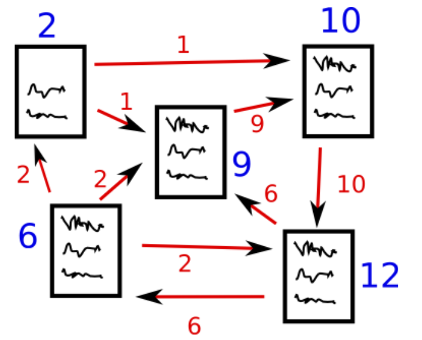

In [ ]:
# create graph representation by sim_mat
  # sentence as node, sim scoryye as link
nx_graph = nx.from_numpy_array(sim_mat)
# calculate TextRank score by pagerank
scores = nx.pagerank(nx_graph)

## summary extraction
extract the top N sentences based on their rankings for summary generation.

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [ ]:
ranked_sentences

[(0.02298091933799598,
  "Further,\nthere is widespread public concern that air pollution will reduce one of the\ncountry's main sources of income, tourism, in places like Chiang Mai."),
 (0.022927749437721696,
  'None has\nprioritised air pollution, called for wide-ranging reforms, or made air\npollution a major part of their campaign.'),
 (0.02289849492747717,
  'While more data\non the sources of pollution would be helpful, it is clear that what the\ncurrent government has been doing since 2014 (not to mention the actions\nof previous governments) has not worked.'),
 (0.022834929922051328,
  'The citizen-driven proposed "Thai Clean Air Act" Act provides the tools to\naddress the underlying causes that have so far impeded the resolution of\nthis public health crisis.'),
 (0.022778536012741234,
  'Countries who have been able to reduce air pollution show us that while\nthis is a wickedly difficult problem to solve, it is not impossible and there\nare policy solutions out there which c

In [ ]:
# Extract top 5 sentences as the summary
for i in range(5):
  print(ranked_sentences[i][1] + '\n')

Further,
there is widespread public concern that air pollution will reduce one of the
country's main sources of income, tourism, in places like Chiang Mai.

None has
prioritised air pollution, called for wide-ranging reforms, or made air
pollution a major part of their campaign.

While more data
on the sources of pollution would be helpful, it is clear that what the
current government has been doing since 2014 (not to mention the actions
of previous governments) has not worked.

The citizen-driven proposed "Thai Clean Air Act" Act provides the tools to
address the underlying causes that have so far impeded the resolution of
this public health crisis.

Countries who have been able to reduce air pollution show us that while
this is a wickedly difficult problem to solve, it is not impossible and there
are policy solutions out there which could reduce pollutant levels and
improve health nationwide.



# other summarization algorithms

In [ ]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21708 sha256=1b1f13355265667e91b43410d12c8542a5be04301991ca8e8887f8e324f49174
  Stored in directory: /root/.cache/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=13201386bf47fb03aa4af8d4baf585096b9b206d174a61aba86d4bebf6af20a5
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c9

In [ ]:
import sumy

In [ ]:
# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

## LexRank algorithm

In [ ]:
# Import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
# Initializing the parser
my_data = PlaintextParser.from_string(data,Tokenizer('english'))

In [ ]:
# Creating a summary of 3 sentences.
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_data.document,sentences_count=5)

# Printing the summary
for sentence in lexrank_summary:
  print(sentence)

But every year the government fails to address the underlying drivers of the problem.
We know there are three major sources of air pollution in the country: transport, industry, and agriculture, and that pollution is worse in winter months when there is an upsurge in agricultural burning and a temperature inversion resulting in less wind and rain to disperse pollutants.
Industry: Thailand has no emissions inventory database to record industrial emissions, despite having around 140,000 polluting factories.
However, no information has been released on which companies are responsible for the burning and no government has ever held these agribusinesses accountable or penalised them for the burning.
The citizen-driven proposed "Thai Clean Air Act" Act provides the tools to address the underlying causes that have so far impeded the resolution of this public health crisis.


## latent semantic analysis (LSA)

In [ ]:
# Import the LSA summarizer
from sumy.summarizers.lsa import LsaSummarizer
# Initializing the parser
my_data = PlaintextParser.from_string(data,Tokenizer('english'))

In [ ]:
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(my_data.document,5)

# Printing the summary
for sentence in lsa_summary:
    print(sentence)

However, despite these grim statistics, this year's air pollution menace and the government's ham-fisted response seems like deja vu.
The Thailand Development Research Institute says that of their 87 major policy promises, only three are environmentally-related.
Countries who have been able to reduce air pollution show us that while this is a wickedly difficult problem to solve, it is not impossible and there are policy solutions out there which could reduce pollutant levels and improve health nationwide.
A number of cities not only have designated bus lanes but also switched their fleets to new vehicles powered by electricity or natural gas.
Further, in 2019, the National Legislative Assembly revised the Factory Act 1992 so that only industrial companies with more than 50 employees and machinery exceeding 50 horsepower are subject to monitoring for waste discharge and anti- pollution measures, including air pollution.


## Luhn

In [ ]:
# Import the summarizer
from sumy.summarizers.luhn import LuhnSummarizer
# Initializing the parser
my_data = PlaintextParser.from_string(data,Tokenizer('english'))

In [ ]:
#  Creating the summarizer
luhn_summarizer=LuhnSummarizer()
luhn_summary=luhn_summarizer(my_data.document,sentences_count=5)

# Printing the summary
for sentence in luhn_summary:
  print(sentence)

This past week, two of Thailand's largest cities, Bangkok and Chiang Mai, earned the ignominious privilege of being among the 10 cities of the world with the worst air quality during that period.
While more data on the sources of pollution would be helpful, it is clear that what the current government has been doing since 2014 (not to mention the actions of previous governments) has not worked.
We know there are three major sources of air pollution in the country: transport, industry, and agriculture, and that pollution is worse in winter months when there is an upsurge in agricultural burning and a temperature inversion resulting in less wind and rain to disperse pollutants.
Countries who have been able to reduce air pollution show us that while this is a wickedly difficult problem to solve, it is not impossible and there are policy solutions out there which could reduce pollutant levels and improve health nationwide.
We hope that all parties will show that they truly care about the h

## KL

In [ ]:
# Import the summarizer
from sumy.summarizers.kl import KLSummarizer
my_data = PlaintextParser.from_string(data,Tokenizer('english'))

In [ ]:
# Instantiating the  KLSummarizer
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(my_data.document,sentences_count=5)

# Printing the summary
for sentence in kl_summary:
    print(sentence)

Prime Minister Prayut Chan-o-cha has halted three draft laws related to air pollution.
Countries who have been able to reduce air pollution show us that while this is a wickedly difficult problem to solve, it is not impossible and there are policy solutions out there which could reduce pollutant levels and improve health nationwide.
Finally, cities like Singapore and London were able to significantly reduce their air pollution and traffic congestion by introducing congestion pricing schemes.
Industry: Thailand has no emissions inventory database to record industrial emissions, despite having around 140,000 polluting factories.
Finally, it includes economic incentives to push current major polluters to reduce their emissions.
